# Exporting the Weather Data

Step 1: Create an account on [OpenWeatherMap](https://www.openweathermap.org/) webpage.

Step 2: Once you have your OpenWeatherMap account, use [“5-day / 3-hour forecast”](https://openweathermap.org/forecast5) and [“Current Weather Data”](https://openweathermap.org/current) API calls to get the data for your city.

Step 3: Print the data you obtained from API calls (optional: be creative if you want - visualize your data!).

Step 4: Export the two datasets as separate CSV files.

In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
base_url = 'http://api.openweathermap.org/data/2.5/'
key = '&APPID=83aa203ff52dec7ebcf3f07eaeb8b4ec'
my_city = 'q=Shanghai,cn'

forecast_url = base_url + 'forecast?'
current_url = base_url + 'weather?'


In [3]:
forecast_response = requests.get(forecast_url + my_city + key)
current_response = requests.get(current_url + my_city + key)

# Expect 200 for HTTP status code query from both requests
print(forecast_response.status_code, current_response.status_code)

200 200


In [4]:
# this is because ..._response.content comes in bytes, not in string -> json to dict 
f_r = forecast_response.json()
c_r = current_response.json()

### Exploring the Current Weather Data

In [5]:
for k in c_r.keys():
    print(k + ': ', c_r[k])

coord:  {'lon': 121.46, 'lat': 31.22}
weather:  [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}]
base:  stations
main:  {'temp': 278.07, 'feels_like': 275.83, 'temp_min': 275.15, 'temp_max': 280.93, 'pressure': 1027, 'humidity': 86}
visibility:  6000
wind:  {'speed': 1, 'deg': 170}
clouds:  {'all': 0}
dt:  1581274102
sys:  {'type': 1, 'id': 9659, 'country': 'CN', 'sunrise': 1581288047, 'sunset': 1581327365}
timezone:  28800
id:  1796236
name:  Shanghai
cod:  200


*Comparing the **temparature** data from the Current Weather Data*

In [6]:
current_temp_dict = {}
values = []
keys = []
for key,value in c_r['main'].items():
    if isinstance(value, float):
        values.append(value)
        keys.append(key)
        current_temp_dict[key] = value
        print(key + ': ',value)

temp:  278.07
feels_like:  275.83
temp_min:  275.15
temp_max:  280.93


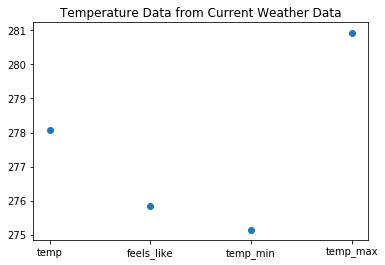

In [7]:
plt.scatter(keys, values);
plt.title('Temperature Data from Current Weather Data');
#plt.xticks()
plt.show()

### Exploring the Forecast Weather Data

In [8]:
for k in f_r.keys():
    print(k)

cod
message
cnt
list
city


*Accessing **a single day's** weather details in 5 Days Forecast Data*

In [9]:
f_r['list'][0]

{'dt': 1581282000,
 'main': {'temp': 277.76,
  'feels_like': 274.46,
  'temp_min': 277.76,
  'temp_max': 279.3,
  'pressure': 1027,
  'sea_level': 1027,
  'grnd_level': 1026,
  'humidity': 69,
  'temp_kf': -1.54},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'clouds': {'all': 0},
 'wind': {'speed': 1.76, 'deg': 229},
 'sys': {'pod': 'n'},
 'dt_txt': '2020-02-09 21:00:00'}

*Comparing the **temparature** data from the 5 Days Forecast Data*

In [10]:
forecast_temp_dict = {}
forecast_temp_dict['Date'] = []
forecast_temp_dict['Temp'] = []
forecast_temp_dict['Feels Like'] = []
forecast_temp_dict['Min Temp'] = []
forecast_temp_dict['Max Temp'] = []

for data in f_r['list']:
    forecast_temp_dict['Date'].append(data['dt_txt'])
    forecast_temp_dict['Temp'].append(data['main']['temp'])
    forecast_temp_dict['Feels Like'].append(data['main']['feels_like'])
    forecast_temp_dict['Min Temp'].append(data['main']['temp_min'])
    forecast_temp_dict['Max Temp'].append(data['main']['temp_max'])
    
    
forecast_temp_df = pd.DataFrame(forecast_temp_dict)

In [11]:
forecast_temp_df['Date']= pd.to_datetime(forecast_temp_df['Date']) 
forecast_temp_df = forecast_temp_df.set_index('Date')

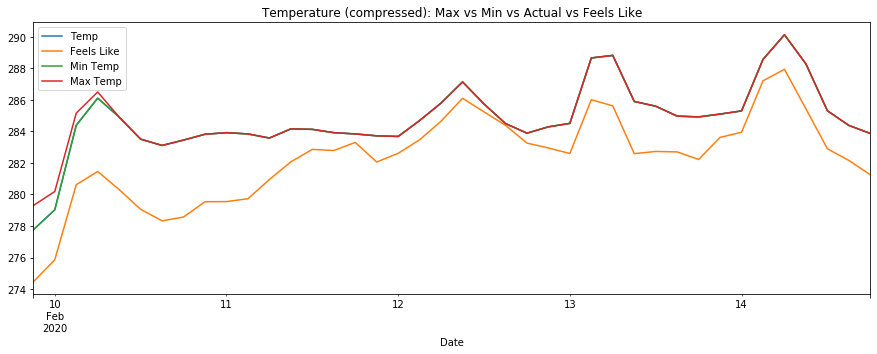

In [12]:
forecast_temp_df.plot(figsize=(15,5), title='Temperature (compressed): Max vs Min vs Actual vs Feels Like');

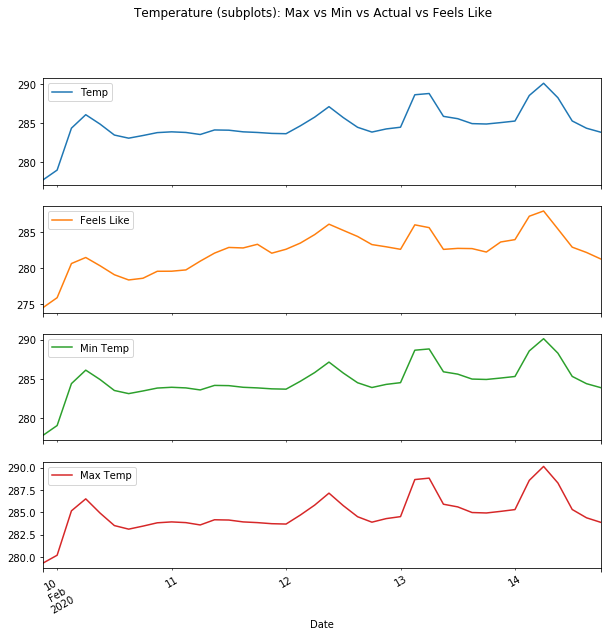

In [13]:
forecast_temp_df.plot(figsize=(10,10), subplots=True, use_index=True, title='Temperature (subplots): Max vs Min vs Actual vs Feels Like');

### Exporting the two datasets as separate CSV


In [14]:
with open('current.csv', 'w') as f:
    for key in c_r.keys():
        f.write("%s, %s\n" % (key, c_r[key]))

In [15]:
with open('forecast.csv', 'w') as f:
    for key in f_r.keys():
        f.write("%s, %s\n" % (key, f_r[key]))

In [16]:
! dir

 Volume in drive C is odartei
 Volume Serial Number is 0002-752F

 Directory of C:\Users\Administrator\Desktop\ELU\elu_notebooks\M3

10/02/2020  02:52 AM    <DIR>          .
10/02/2020  02:52 AM    <DIR>          ..
06/02/2020  09:52 PM    <DIR>          .ipynb_checkpoints
31/01/2020  03:23 AM           399,187 basic_sql_query_structure.png
29/11/2015  11:53 AM           884,736 chinook.db
09/02/2020  06:41 PM             1,823 Connecting to Twitter API.ipynb
10/02/2020  02:53 AM               492 current.csv
31/01/2020  03:23 AM            67,584 factbook.db
10/02/2020  02:53 AM            16,515 forecast.csv
31/01/2020  03:23 AM           167,889 joins.png
31/01/2020  05:17 PM             9,290 m3-w2_api_class.ipynb
01/02/2020  02:21 PM           812,780 M3W1_workshop_exercise.ipynb
03/02/2020  02:10 AM            16,903 M3_W1_Michael_O_Mills.ipynb
05/02/2020  08:30 PM             9,267 M3_W1_Michael_O_Mills_Using SQLAlchemy.ipynb
10/02/2020  02:51 AM           141,453 M3_W2_Michael_